In [1]:
import pandas as pd
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import imageio
import cv2

In [2]:
initial_train_df = pd.read_csv('../../data/cell_mask_study_30000.csv')
extra_train_df = pd.read_csv('../../data/train_ext/extra_data_full.csv')

In [4]:
initial_train_df.head(2)

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,fold,total_cell_mask,selected_cells
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,8,7
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,15,15


In [5]:
extra_train_df.head(2)

,Image,Label,Cellline,in_trainset,Label_idx,ID,0,1,2,3,...,9,10,11,12,13,14,15,16,17,18
0,https://images.proteinatlas.org/10007/1876_A7_32,Endoplasmic reticulum,ASC TERT1,False,6,1876_A7_32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://images.proteinatlas.org/10007/1876_A7_37,Endoplasmic reticulum,ASC TERT1,False,6,1876_A7_37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# first we will populate the selected_cells

In [3]:
def create_df(df, PATH = 'data/train_h5_256_40000_v6/',):
    actual_cells = []
    
    for i in df['ID'].values:
        try:
            actual_cells.append(len(os.listdir(os.path.join(PATH, i))))
        except:
            print('Missing ',i)
            actual_cells.append(0)
    df['selected_cells'] = actual_cells

    
    return df

extra_train_df = create_df(extra_train_df, PATH = '../../data/train_h5_256_40000_v6/',)
initial_train_df = create_df(initial_train_df, PATH = '../../data/train_h5_256_40000_v6/',)


Missing  1959_B4_2
Missing  1959_G3_1
Missing  1959_G3_2
Missing  1887_A3_3
Missing  940f418a-bba4-11e8-b2b9-ac1f6b6435d0
Missing  bb9a63c8-bbaf-11e8-b2ba-ac1f6b6435d0
Missing  6d047720-bbb0-11e8-b2ba-ac1f6b6435d0
Missing  21f3ec6a-bbb6-11e8-b2ba-ac1f6b6435d0
Missing  422968da-bbba-11e8-b2ba-ac1f6b6435d0
Missing  30234312-bbbb-11e8-b2ba-ac1f6b6435d0
Missing  10688f2a-bbc8-11e8-b2bc-ac1f6b6435d0
Missing  7930e80e-bbc8-11e8-b2bc-ac1f6b6435d0


In [4]:
print(extra_train_df.shape)
extra_train_df.head()

(23118, 26)


,Image,Label,Cellline,in_trainset,Label_idx,ID,0,1,2,3,...,10,11,12,13,14,15,16,17,18,selected_cells
0,https://images.proteinatlas.org/10007/1876_A7_32,Endoplasmic reticulum,ASC TERT1,False,6,1876_A7_32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1,https://images.proteinatlas.org/10007/1876_A7_37,Endoplasmic reticulum,ASC TERT1,False,6,1876_A7_37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,https://images.proteinatlas.org/10007/1901_A10_2,Vesicles,U-2 OS,False,17,1901_A10_2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9
3,https://images.proteinatlas.org/10007/1901_A10_3,Vesicles,U-2 OS,False,17,1901_A10_3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7
4,https://images.proteinatlas.org/10007/1936_E4_2,Endoplasmic reticulum,BJ,False,6,1936_E4_2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [5]:
extra_train_df = extra_train_df[(extra_train_df['selected_cells'] >0) ] 
print(extra_train_df.shape)
extra_train_df.to_csv('../../data/train_ext/extra_data_full_3.csv')
initial_train_df.to_csv('../../data/cell_mask_study_40000_2.csv')

(23114, 26)


# cleaning the df for merging

In [6]:
initial_train_df = initial_train_df.drop(['Unnamed: 0', 'fold',  'total_cell_mask'], axis= 1)
extra_train_df = extra_train_df.drop(['Image', 'Label', 'Cellline', 'in_trainset', ], axis= 1)
extra_train_df = extra_train_df.rename(columns ={'Label_idx':'Label'})

In [10]:
extra_train_df.head(5)

,Label,ID,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,selected_cells
0,6,1876_A7_32,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,11
1,6,1876_A7_37,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,17
2,17,1901_A10_2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,11
3,17,1901_A10_3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7
4,6,1936_E4_2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10


In [7]:
print(initial_train_df.shape, extra_train_df.shape )

(21806, 22) (23114, 22)


In [8]:
print(initial_train_df.shape, extra_train_df.shape )

(21806, 22) (23114, 22)


In [9]:
combined_df = pd.concat([initial_train_df,extra_train_df],ignore_index=True)
print(combined_df.shape)

(44920, 22)


In [10]:
combined_df.head()

,ID,Label,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,selected_cells
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,12
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,34


In [11]:
combined_df.to_csv('../../data/combined_df_v2.csv')

## lets cut it to 30 and see how it works

In [15]:
train_df = pd.read_csv('../../data/combined_df_v2.csv')
hpa_duplicates = pd.read_csv('../../data/hpa_duplicates.csv')
hpa_duplicate_score_0 = hpa_duplicates[hpa_duplicates['score']==0]
print('repeting samples ',hpa_duplicate_score_0.shape)
print('ful train df ',train_df.shape)
train_df = train_df[~train_df['ID'].isin(hpa_duplicate_score_0['image2'].values)]#[['ID','Label']]
print('removed train df ',train_df.shape)


TOP = 31

filtered_df_13_less = train_df[(train_df['selected_cells'] >4) & (train_df['selected_cells'] < TOP)] 


filtered_13_high = train_df[train_df['selected_cells'] >=TOP]
filtered_13_high['is_single'] = filtered_13_high[[str(i) for i in range(0,18)]].apply(np.sum, axis=1)

#lets try to add class 11 even if its not single and more than TOP count
filtered_13_high_single_class = filtered_13_high[(filtered_13_high['is_single'] ==1) | (train_df['11'] == 1)]

filtered_full = pd.concat([filtered_df_13_less, filtered_13_high_single_class])

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

SEED = 1
FOLDS = 5

labels = [str(i) for i in range(19)]

filtered_full = filtered_full.reset_index(drop = True)

skf = MultilabelStratifiedKFold(n_splits=FOLDS, shuffle=True, 
          random_state=SEED)

filtered_full['fold'] = -1
for fold,(idxT,idxV) in enumerate( skf.split(filtered_full,filtered_full[labels].values)):
    filtered_full['fold'][idxV] = fold
    
print(filtered_full.shape)
filtered_full.head()

filtered_full = filtered_full.drop(['Unnamed: 0'], axis = 1)
filtered_full.to_csv('../../data/train_fold_v11.csv', index = False)

repeting samples  (94, 3)
ful train df  (44920, 23)
removed train df  (44829, 23)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

(42993, 25)


In [16]:
filtered_full.tail()

,ID,Label,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,selected_cells,is_single,fold
41548,1462_B1_1,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,36,1.0,2
41549,1462_B1_3,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,35,1.0,0
41550,1399_A10_9,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,32,1.0,3
41551,1372_D1_4,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,39,1.0,4
41552,962_E1_1,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,38,1.0,2


In [14]:
class_11 = filtered_full[filtered_full['11']==1]
print(class_11.shape)

(216, 24)


## lets viz the data of new extra imgs

In [17]:
#single
hdf5_path = '../../data/train_h5_256_40000_v5/1876_A7_32/1876_A7_32_1.hdf5'
with h5py.File(hdf5_path,"r") as h:
    single_img = h['train_img'][...]

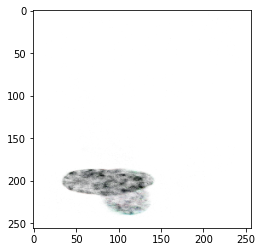

In [24]:
plt.imshow(single_img)

In [28]:
single_img.dtype

dtype('uint8')

In [58]:
im_tok = '1901_A10_3'
img_red    = np.expand_dims(cv2.imread(os.path.join('../../data/train_ext/HPA-Challenge-2021-trainset-extra',f'{im_tok}_red.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
img_yellow = np.expand_dims(cv2.imread(os.path.join('../../data/train_ext/HPA-Challenge-2021-trainset-extra',f'{im_tok}_yellow.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
img_green  = np.expand_dims(cv2.imread(os.path.join('../../data/train_ext/HPA-Challenge-2021-trainset-extra',f'{im_tok}_green.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
img_blue   = np.expand_dims(cv2.imread(os.path.join('../../data/train_ext/HPA-Challenge-2021-trainset-extra',f'{im_tok}_blue.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
image = np.concatenate([img_red, img_yellow, img_green, img_blue], axis=-1)
print(image.max())

255


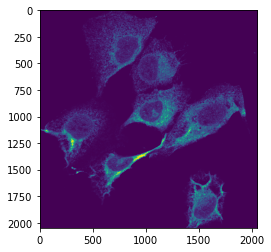

In [60]:
plt.imshow(image[:,:,1])

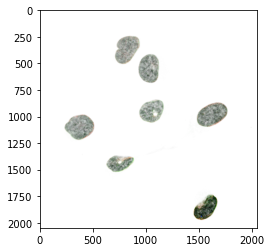

In [61]:
plt.imshow(image)

In [42]:
img_red.shape

(2048, 2048, 1)

# old one

In [25]:
im_tok = '5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0'
img_red    = np.expand_dims(cv2.imread(os.path.join('../../data/train',f'{im_tok}_red.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
img_yellow = np.expand_dims(cv2.imread(os.path.join('../../data/train',f'{im_tok}_yellow.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
img_green  = np.expand_dims(cv2.imread(os.path.join('../../data/train',f'{im_tok}_green.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
img_blue   = np.expand_dims(cv2.imread(os.path.join('../../data/train',f'{im_tok}_blue.png'), cv2.IMREAD_GRAYSCALE), axis = -1)
image = np.concatenate([img_red, img_yellow, img_green, img_blue], axis=-1)
print(image.max())

255


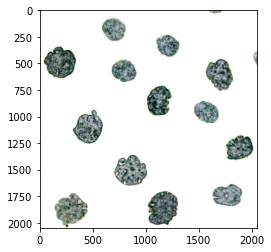

In [26]:
plt.imshow(image)

In [18]:
os.listdir('../../data/train_h5_256_40000_v5/6057d35c-bb9f-11e8-b2b9-ac1f6b6435d0/')


['6057d35c-bb9f-11e8-b2b9-ac1f6b6435d0_1.hdf5']